In [1]:
import sympy as sp
sp.init_printing()
import IPython.display as disp
%matplotlib ipympl
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True
import numpy as np

# 2D
# Continuous piecewise bilinear functions
drawing = f"""
        _  .___._____.
        |  |   |     |
        |  |   |     |
    hy+ |  |   |     |
        |  |   |     |
        _  .___._____.
        |  |   |     |
    hy- |  |   |     |
        _  .___._____.
        
           |___|_____|
             hx-  hx+
             
"""
print(drawing)


        _  .___._____.
        |  |   |     |
        |  |   |     |
    hy+ |  |   |     |
        |  |   |     |
        _  .___._____.
        |  |   |     |
    hy- |  |   |     |
        _  .___._____.

           |___|_____|
             hx-  hx+




In [2]:
# !!! Indicates a hypothesis (should be studied and considered)

# !!! Mode selection
mode_values = "real" # real or complex values

Wavenumber variables

In [3]:
# Physical wavenumbers
k = sp.Symbol('k',
              #real=True, # !!!
              #positive=True, # !!!
              )
theta = sp.symbols('theta')
k_x = k * sp.cos(theta)
k_y = k * sp.sin(theta)
disp.display(k_x)
disp.display(k_y)

# Numerical wavenumbers
kh = sp.Symbol('k^h',
              #real=True, # !!!
              #positive=True, # !!!
              )
theta = sp.symbols('theta^h')
kh_x = kh * sp.cos(theta)
kh_y = kh * sp.sin(theta)
disp.display(kh_x)
disp.display(kh_y)

Coordinate variables

In [4]:
from sympy.vector import CoordSys3D
sys = CoordSys3D('sys', vector_names=['i', 'j', 'k'])
x, y, z = sys.x, sys.y, sys.z

Galerkine variational forms

In [5]:
from sympy.integrals.intpoly import Polygon, polytope_integrate
from sympy.vector import gradient


def a_G(u, v, xa, xb, ya, yb):
    
    
    # 2D rectangle domain
    domain = Polygon((xa, ya), (xb, ya), (xb, yb), (xa, yb))
    
    # 2D gradients
    grad_u = gradient(u)
    grad_v = gradient(v)
    
    return sp.integrate(grad_u & grad_v, (x, xa, xb), (y, ya, yb)) - (k**2 * sp.integrate(u * v, (x, xa, xb), (y, ya, yb)))


Grid sizes

In [6]:
h_x_, h_y_ = dict(), dict()
h_x_["-"], h_x_["+"], h_y_["-"], h_y_["+"] = sp.symbols('h_x- h_x+ h_y- h_y+')

Grid points centered around origin

In [7]:
x_, y_ = dict(), dict()
x_["-1"], x_["0"], x_["+1"] = -h_x_["-"], sp.sympify(0), +h_x_["+"]
y_["-1"], y_["0"], y_["+1"] = -h_y_["-"], sp.sympify(0), +h_y_["+"]

Point-wise shape functions

In [8]:
N_x_, N_y_ = dict(), dict()

N_x_["-1"] = - x / h_x_["-"]
N_x_["0-"] = (x / h_x_["-"]) + 1
N_x_["0+"] = (- x / h_x_["+"]) + 1
N_x_["+1"] = x / h_x_["+"]

N_y_["-1"] = - y / h_y_["-"]
N_y_["0-"] = (y / h_y_["-"]) + 1
N_y_["0+"] = (- y / h_y_["+"]) + 1
N_y_["+1"] = y / h_y_["+"]

N_ = dict()

In [9]:
HX_M, HX_P, HY_M, HY_P = 0.8, 1.1, 0.7, 1

In [10]:
# Coordinate pairs generation via cartesian products, over each quadrant

num = 10

X_M = np.linspace(-HX_M, 0, num=num)
X_P = np.linspace(0, +HX_P, num=num)
Y_M = np.linspace(-HY_M, 0, num=num)
Y_P = np.linspace(0, +HY_P, num=num)

XY_MM = np.transpose([np.tile(X_M, len(Y_M)), np.repeat(Y_M, len(X_M))])
XY_MP = np.transpose([np.tile(X_M, len(Y_P)), np.repeat(Y_P, len(X_M))])
XY_PM = np.transpose([np.tile(X_P, len(Y_M)), np.repeat(Y_M, len(X_P))])
XY_PP = np.transpose([np.tile(X_P, len(Y_P)), np.repeat(Y_P, len(X_P))])

Text(0.5, 0.5, 'y')

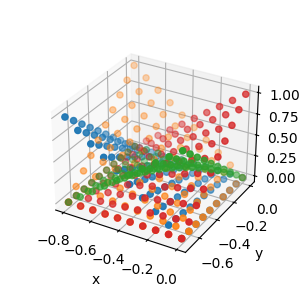

In [11]:
# Bottom-left quadrant shape functions

N_["-1, -1"] = N_x_["-1"] * N_y_["-1"]
N_["-1, 0-"] =  N_x_["-1"] * N_y_["0-"]
N_["0-, -1"] = N_x_["0-"] * N_y_["-1"]
N_["0-, 0-"] =  N_x_["0-"] * N_y_["0-"]

XY = XY_MM

Z0 = []
Z0.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["-"]], expr=N_["-1, -1"])(XY[:,0], XY[:,1], HX_M, HY_M))
Z0.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["-"]], expr=N_["-1, 0-"])(XY[:,0], XY[:,1], HX_M, HY_M))
Z0.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["-"]], expr=N_["0-, -1"])(XY[:,0], XY[:,1], HX_M, HY_M))
Z0.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["-"]], expr=N_["0-, 0-"])(XY[:,0], XY[:,1], HX_M, HY_M))

fig0 = plt.figure(figsize=(3, 3))
ax = fig0.add_subplot(projection='3d')
for Z in Z0:
    ax.scatter(XY[:,0], XY[:,1], Z)
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0.5, 0.5, 'y')

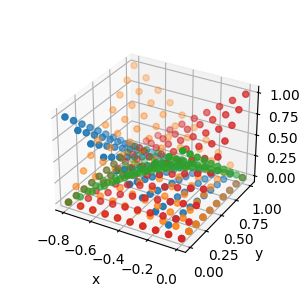

In [12]:
# Upper-left quadrant shape functions

N_["-1, 0+"] = N_x_["-1"] * N_y_["0+"]
N_["-1, +1"] =  N_x_["-1"] * N_y_["+1"]
N_["0-, 0+"] = N_x_["0-"] * N_y_["0+"]
N_["0-, +1"] =  N_x_["0-"] * N_y_["+1"]

XY = XY_MP

Z1 = []
Z1.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["+"]], expr=N_["-1, 0+"])(XY[:,0], XY[:,1], HX_M, HY_P))
Z1.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["+"]], expr=N_["-1, +1"])(XY[:,0], XY[:,1], HX_M, HY_P))
Z1.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["+"]], expr=N_["0-, 0+"])(XY[:,0], XY[:,1], HX_M, HY_P))
Z1.append(sp.lambdify(args=[x, y, h_x_["-"], h_y_["+"]], expr=N_["0-, +1"])(XY[:,0], XY[:,1], HX_M, HY_P))

fig0 = plt.figure(figsize=(3, 3))
ax = fig0.add_subplot(projection='3d')
for Z in Z1:
    ax.scatter(XY[:,0], XY[:,1], Z)
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0.5, 0.5, 'y')

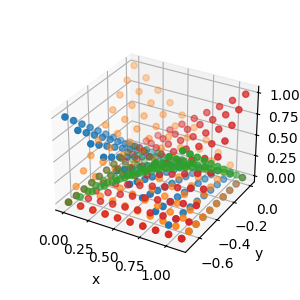

In [13]:
# Bottom-right quadrant shape functions

N_["0+, -1"] = N_x_["0+"] * N_y_["-1"]
N_["0+, 0-"] =  N_x_["0+"] * N_y_["0-"]
N_["+1, -1"] = N_x_["+1"] * N_y_["-1"]
N_["+1, 0-"] =  N_x_["+1"] * N_y_["0-"]

XY = XY_PM

Z2 = []
Z2.append(sp.lambdify(args=[x, y, h_x_["+"], h_y_["-"]], expr=N_["0+, -1"])(XY[:,0], XY[:,1], HX_P, HY_M))
Z2.append(sp.lambdify(args=[x, y, h_x_["+"], h_y_["-"]], expr=N_["0+, 0-"])(XY[:,0], XY[:,1], HX_P, HY_M))
Z2.append(sp.lambdify(args=[x, y, h_x_["+"], h_y_["-"]], expr=N_["+1, -1"])(XY[:,0], XY[:,1], HX_P, HY_M))
Z2.append(sp.lambdify(args=[x, y, h_x_["+"], h_y_["-"]], expr=N_["+1, 0-"])(XY[:,0], XY[:,1], HX_P, HY_M))

fig0 = plt.figure(figsize=(3, 3))
ax = fig0.add_subplot(projection='3d')
for Z in Z2:
    ax.scatter(XY[:,0], XY[:,1], Z)
ax.set_xlabel('x')
ax.set_ylabel('y')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Text(0.5, 0.5, 'y')

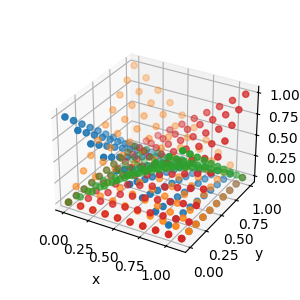

In [14]:

# Upper-right quadrant shape functions

N_["0+, 0+"] = N_x_["0+"] * N_y_["0+"]
N_["0+, +1"] =  N_x_["0+"] * N_y_["+1"]
N_["+1, 0+"] = N_x_["+1"] * N_y_["0+"]
N_["+1, +1"] =  N_x_["+1"] * N_y_["+1"]

XY = XY_PP

Z3 = np.zeros((4, len(XY)))
Z3[0] = sp.lambdify(args=[x, y, h_x_["+"], h_y_["+"]], expr=N_["0+, 0+"])(XY[:,0], XY[:,1], HX_P, HY_P)
Z3[1] = sp.lambdify(args=[x, y, h_x_["+"], h_y_["+"]], expr=N_["0+, +1"])(XY[:,0], XY[:,1], HX_P, HY_P)
Z3[2] = sp.lambdify(args=[x, y, h_x_["+"], h_y_["+"]], expr=N_["+1, 0+"])(XY[:,0], XY[:,1], HX_P, HY_P)
Z3[3] = sp.lambdify(args=[x, y, h_x_["+"], h_y_["+"]], expr=N_["+1, +1"])(XY[:,0], XY[:,1], HX_P, HY_P)

print(Z3.sum(axis=0))

fig0 = plt.figure(figsize=(3, 3))
ax = fig0.add_subplot(projection='3d')
for Z in Z3:
    ax.scatter(XY[:,0], XY[:,1], Z)
ax.set_xlabel('x')
ax.set_ylabel('y')


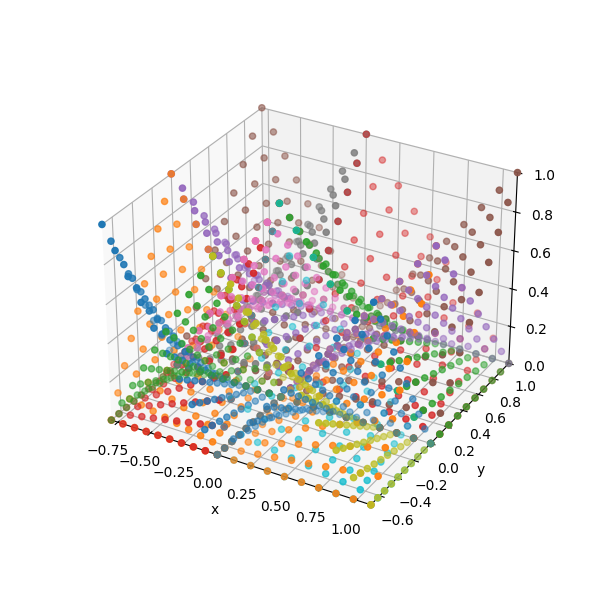

In [15]:
# ALtogether

fig0 = plt.figure(figsize=(6, 6))
ax = fig0.add_subplot(projection='3d')

XY = XY_MM
for Z in Z0:
    ax.scatter(XY[:,0], XY[:,1], Z)
XY = XY_MP
for Z in Z1:
    ax.scatter(XY[:,0], XY[:,1], Z)
XY = XY_PM
for Z in Z2:
    ax.scatter(XY[:,0], XY[:,1], Z)
XY = XY_PP
for Z in Z3:
    ax.scatter(XY[:,0], XY[:,1], Z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(left=-HX_M, right=+HX_P)
ax.set_ylim(bottom=-HY_M, top=+HY_P)
ax.set_zlim(bottom=0, top=1)

Linear system coefficients

In [16]:
A_G00_ = dict()

A_G00_["-1, -1"] = a_G(N_["-1, -1"], N_["0-, 0-"], x_["-1"], x_["0"], y_["-1"], y_["0"]) # bottom-left element shared
A_G00_["-1, 0"] = a_G(N_["-1, 0-"], N_["0-, 0-"], x_["-1"], x_["0"], y_["-1"], y_["0"]) + a_G(N_["-1, 0+"], N_["0-, 0+"], x_["-1"], x_["0"], y_["0"], y_["+1"]) # bottom and upper left elements shared
A_G00_["-1, +1"] = a_G(N_["-1, +1"], N_["0-, 0+"], x_["-1"], x_["0"], y_["0"], y_["+1"]) # upper-left element shared

A_G00_["0, -1"] = a_G(N_["0-, -1"], N_["0-, 0-"], x_["-1"], x_["0"], y_["-1"], y_["0"]) + a_G(N_["0+, -1"], N_["0+, 0-"], x_["0"], x_["+1"], y_["-1"], y_["0"]) # left and right bottom elements shared
A_G00_["0, 0"] = a_G(N_["0-, 0-"], N_["0-, 0-"], x_["-1"], x_["0"], y_["-1"], y_["0"]) + a_G(N_["0-, 0+"], N_["0-, 0+"], x_["-1"], x_["0"], y_["0"], y_["+1"]) + a_G(N_["0+, 0-"], N_["0+, 0-"], x_["0"], x_["+1"], y_["-1"], y_["0"]) + a_G(N_["0+, 0+"], N_["0+, 0+"], x_["0"], x_["+1"], y_["0"], y_["+1"]) # all 4 elements shared
A_G00_["0, +1"] = a_G(N_["0-, +1"], N_["0-, 0+"], x_["-1"], x_["0"], y_["0"], y_["+1"]) + a_G(N_["0+, +1"], N_["0+, 0+"], x_["0"], x_["+1"], y_["0"], y_["+1"]) # left and right upper elements shared

A_G00_["+1, -1"] = a_G(N_["+1, -1"], N_["0+, 0-"], x_["0"], x_["+1"], y_["-1"], y_["0"]) # bottom-right element shared
A_G00_["+1, 0"] = a_G(N_["+1, 0-"], N_["0+, 0-"], x_["0"], x_["+1"], y_["-1"], y_["0"]) + a_G(N_["+1, 0+"], N_["0+, 0+"], x_["0"], x_["+1"], y_["0"], y_["+1"]) # bottom and upper right elements shared
A_G00_["+1, +1"] = a_G(N_["+1, +1"], N_["0+, 0+"], x_["0"], x_["+1"], y_["0"], y_["+1"]) # top-right element shared


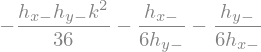

--------------------


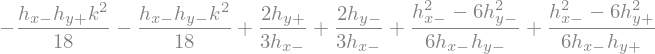

--------------------


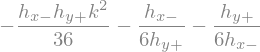

--------------------


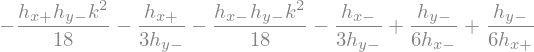

--------------------


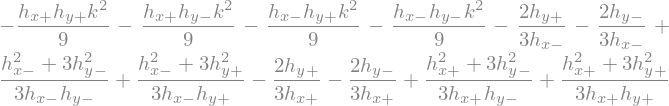

--------------------


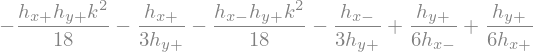

--------------------


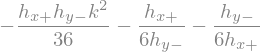

--------------------


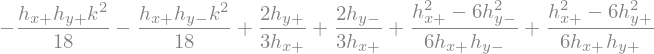

--------------------


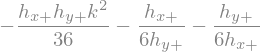

--------------------


In [18]:
for key, value in A_G00_.items():
    disp.display(sp.Symbol(f'A_{{G00}}^{{{key}}}'))
    disp.display(value)
    print("-" * 20)